# 1. Hand-crafted features

In this notebook we are going to look for the lost easter eggs using hand-crafted features. This will give a good understanding of image basics, and illustrates how computers handle and represent visual data.

**Set-up imports and check OpenCV version to test if everyhting is setup correctly.**

In [1]:
import cv2
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Add the project root to sys.path
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from utils.image_tools import read_image, show_image, show_img_inline, rgb_to_grayscale, draw_rectangle, draw_rectangle_xyxy, xyxy_to_xywh, nothing

print(cv2.__version__)

4.11.0


## Easter egg detection with OpenCV

In this notebook, you'll learn to use OpenCV's standard functions to detect (easter) eggs.

🕒 Estimated time: 30 minutes

Skills you'll practice:
- Using cv2.cvtColor to work with HSV color space
- Creating binary masks with cv2.inRange for color filtering
- Finding and analyzing contours with cv2.findContours
- Fitting ellipses and filtering by shape area
- **Bonus:** Detecting multiple egg colors and labeling objects

**Documentation:** [OpenCV-docs](https://docs.opencv.org/4.11.0/d1/dfb/intro.html)

### Set data path

In [2]:
# Path to data
image_path = str(project_root / "data" / "1_hand_crafted_features" / "egg")

### Load & Display Image

**Exercise:** open an image.

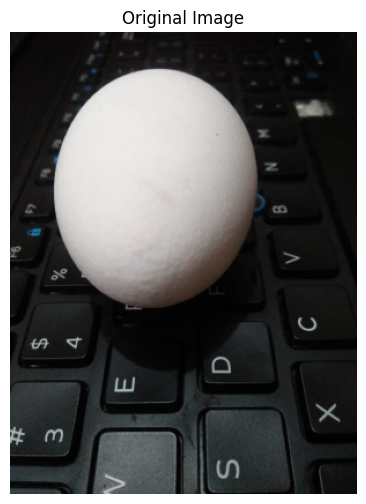

In [3]:
# Change image filename to one you want to try
img = read_image(image_path + "/image_01.jpg")

if img is None:
    print("Image not found. Make sure your image file is in the data folder.")
else:
    show_img_inline(img, title="Original Image")

### Creating a mask

Next we want to isolate the egg from the rest of the image, this can be done by creating mask. This is a binary image which can be overlayed on the original image. An mask is often created in the HSV (Hue, Saturation, Value) colorspace instead of the RGB (Red, Green, Blue) colorspace, this is because it is:

- Less sensitive to shadows or brightness changes
- Better for Color Filtering
- More closely with how humans perceive and describe color

**Exercise:** Show the same image as in the code block above but in the HSV colorspace

In [ ]:
# code block

<details>
<summary>hint</summary>
There is a `cv2.cvtColor function`.
</details>

<details>
<summary>answer</summary>    
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
show_img_inline(hsv, title="HSV colorspace Image")
</details>

#### HSV colorspace

In this exercise we're going to find the values that are necessary for creating a mask by using and interactive application. In this application you can individually change the HSV (high and low values). **Note:** the application opens in a seperate window.

**Exercise:** Find the correct HSV values for making a mask of an egg and write these down (for next exercise). You can do it in one of two ways. You can either create a mask for the egg or a mask for the background, both options will work for the next exercise.

<details>
<summary>hint</summary>
    For creating a mask of the background.
Play with the 
<li>Hue low</li>
<li>Hue high</li> 
<li>Value high</li> 
</details>

<details>
<summary>answer</summary>
set the following values
<li>Hue low: 24</li>
<li>Hue high: 165</li> 
<li>Saturation low: 0</li> 
<li>Saturation low: 255</li> 
<li>Value low: 0</li> 
<li>Value high: 196</li> 
</details>

In [4]:
# Load image if necessary
#img = read_image("your_image.jpg")

# Create resizable window
cv2.namedWindow("HSV Tuner", cv2.WINDOW_NORMAL)
cv2.resizeWindow("HSV Tuner", 1600, 900)  # or screen resolution size

# Create trackbars
cv2.createTrackbar("H Low", "HSV Tuner", 0, 179, nothing)
cv2.createTrackbar("H High", "HSV Tuner", 179, 179, nothing)
cv2.createTrackbar("S Low", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("S High", "HSV Tuner", 255, 255, nothing)
cv2.createTrackbar("V Low", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("V High", "HSV Tuner", 255, 255, nothing)

while True:
    # Get window dimensions
    _, _, win_w, win_h = cv2.getWindowImageRect("HSV Tuner")

    # Check if window is minimized (dimensions = 0)
    if win_w == 0 or win_h == 0:
        key = cv2.waitKey(100)
        if key == 27:  # ESC
            break
        continue

    # Resize image to fit window height while keeping aspect ratio
    h, w = img.shape[:2]
    scale = win_h / h
    new_w = int(w * scale)
    resized_img = cv2.resize(img, (new_w, win_h))

    hsv = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)

    # Get trackbar positions
    hL = cv2.getTrackbarPos("H Low", "HSV Tuner")
    hH = cv2.getTrackbarPos("H High", "HSV Tuner")
    sL = cv2.getTrackbarPos("S Low", "HSV Tuner")
    sH = cv2.getTrackbarPos("S High", "HSV Tuner")
    vL = cv2.getTrackbarPos("V Low", "HSV Tuner")
    vH = cv2.getTrackbarPos("V High", "HSV Tuner")

    # HSV filtering
    lower = np.array([hL, sL, vL])
    upper = np.array([hH, sH, vH])
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(resized_img, resized_img, mask=mask)

    # Stack original and result side-by-side
    stacked = np.hstack((resized_img, result))

    # Resize stacked image if it's too wide for the screen
    if stacked.shape[1] > win_w:
        ratio = win_w / stacked.shape[1]
        new_h = int(stacked.shape[0] * ratio)
        stacked = cv2.resize(stacked, (win_w, new_h))

    cv2.imshow("HSV Tuner", stacked)

    # Break on ESC
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:536: error: (-27:Null pointer) NULL window: 'HSV Tuner' in function 'cvGetWindowRect_W32'


Since you now have selected the HSV values that can be used for creating a mask for your egg image we are going to check if this map can be used on other egg images.

**Exercise** Execute the code block above again but instead of using `image_01.jpg` use `image_02.jpg`. Explain why this does or doesn't work, will this be mask be good enough for isolating the egg?


<details>
<summary>hint</summary>
use the read_image function to read in new image
</details>

<details>
<summary>answer</summary>
img = read_image(image_path + "/image_02.jpg") 
</details>

#### BGR colorspace (extra)
**If your happy with your mask then skip this step otherwise you can try to create a better mask using BRG instead of HSV**

In [ ]:
# Load image if necessary
# img = read_image(image_path + "/image_01.jpg")

# Create resizable window
cv2.namedWindow("RGB Tuner", cv2.WINDOW_NORMAL)
cv2.resizeWindow("RGB Tuner", 1600, 900)

# Create trackbars for RGB low/high thresholds
cv2.createTrackbar("R Low", "RGB Tuner", 0, 255, nothing)
cv2.createTrackbar("R High", "RGB Tuner", 255, 255, nothing)
cv2.createTrackbar("G Low", "RGB Tuner", 0, 255, nothing)
cv2.createTrackbar("G High", "RGB Tuner", 255, 255, nothing)
cv2.createTrackbar("B Low", "RGB Tuner", 0, 255, nothing)
cv2.createTrackbar("B High", "RGB Tuner", 255, 255, nothing)

while True:
    # Get current window size
    _, _, win_w, win_h = cv2.getWindowImageRect("RGB Tuner")

    # Handle minimized window
    if win_w == 0 or win_h == 0:
        key = cv2.waitKey(100)
        if key == 27:  # ESC
            break
        continue

    # Resize image to fit window height (maintain aspect ratio)
    h, w = img.shape[:2]
    scale = win_h / h
    new_w = int(w * scale)
    resized_img = cv2.resize(img, (new_w, win_h))

    # Get trackbar positions
    rL = cv2.getTrackbarPos("R Low", "RGB Tuner")
    rH = cv2.getTrackbarPos("R High", "RGB Tuner")
    gL = cv2.getTrackbarPos("G Low", "RGB Tuner")
    gH = cv2.getTrackbarPos("G High", "RGB Tuner")
    bL = cv2.getTrackbarPos("B Low", "RGB Tuner")
    bH = cv2.getTrackbarPos("B High", "RGB Tuner")

    lower = np.array([bL, gL, rL])  # OpenCV uses BGR order
    upper = np.array([bH, gH, rH])

    mask = cv2.inRange(resized_img, lower, upper)
    result = cv2.bitwise_and(resized_img, resized_img, mask=mask)

    # Stack original and result
    stacked = np.hstack((resized_img, result))

    # Scale to fit screen width if needed
    if stacked.shape[1] > win_w:
        ratio = win_w / stacked.shape[1]
        new_h = int(stacked.shape[0] * ratio)
        stacked = cv2.resize(stacked, (win_w, new_h))

    cv2.imshow("RGB Tuner", stacked)

    # Exit on ESC
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

#### Plot mask

The next step is to apply the mask to our original egg image `image_01.jpg` to see if it is really possible to isolate the egg from the background.
 **Exercise:** Fill in the HSV values you obtained in the previous exercise and put these in the `lower` and `upper` parameter

 <details>
<summary>hint</summary>
The values are in order of H, S, V
</details>

<details>
<summary>answer</summary>
lower = np.array([24, 0, 0])
upper = np.array([165, 255, 169])
</details>

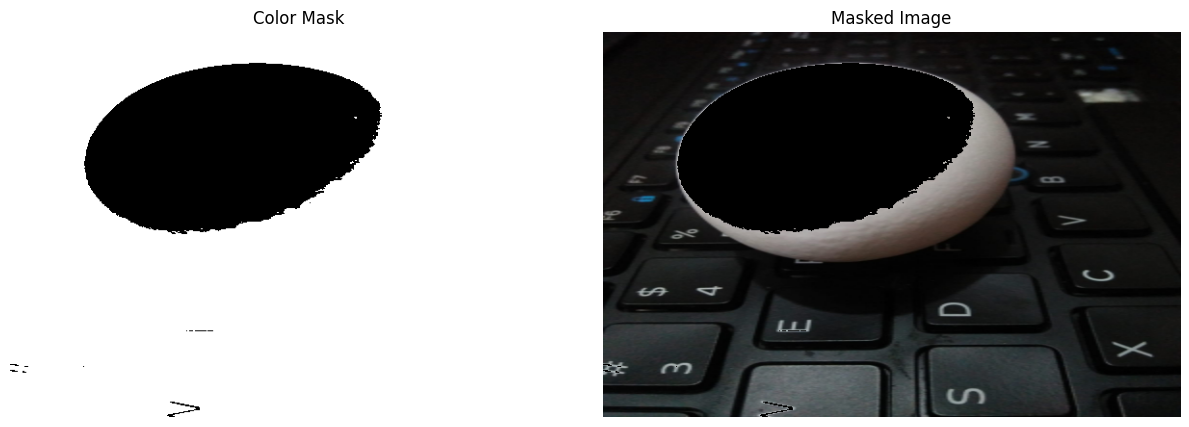

In [19]:
# Load image again if necessary
# img = read_image(image_path + "/image_01.jpg")
#img = cv2.resize(img, (600, 400))

# Convert image to HSV (hue-saturation-value) color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# TODO: Tune these values for your specific egg color
lower = np.array([0, 0, 0])
upper = np.array([179, 255, 179])

# Create color mask
mask = cv2.inRange(hsv, lower, upper)

# Apply mask to original image
masked = cv2.bitwise_and(img, img, mask=mask)

# Visualize mask + result
plt.figure(figsize=(12, 5))

# Show the color mask
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.title("Color Mask")
plt.axis('off')

# Show the masked image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Masked Image")
plt.axis('off')

plt.tight_layout()
plt.show()


#### Shape filtering

In addition to creating a mask to detect an object we can apply shape filtering. This tries to find contours based on the mask we provide and can then draw certain shapes. For detecting eggs it makes the most sense to use an ellipse shape.  

**Exercise:** Set the threshold in the code block below so only the contour of the egg remains. 

<details>
<summary>hint</summary>
Start at 10 and show image then repeatedly keep increasing by ten. 
</details>

****

**NOTE** The mask of the egg needs to be white and the background needs to be black, if this is not the case look up how you can invert the image

<details>
<summary>hint</summary>
Search for `Matrix inversion` in the documentation. 
</details>

<details>
<summary>answer</summary>
Put `~` in front of the mask parameter to invert the images
    
contours, _ = cv2.findContours(~mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
</details>

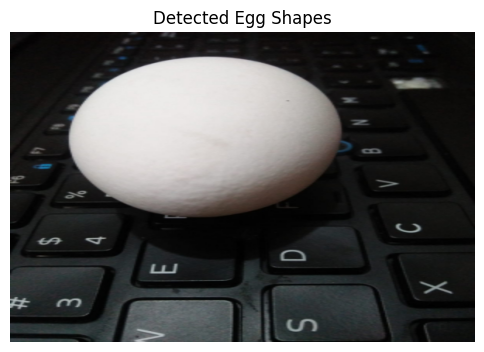

In [22]:
# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area and draw ellipses
output = img.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 99:  # Tune area threshold
        # Fit ellipse if contour has enough points
        if len(cnt) >= 50:
            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(output, ellipse, (0, 255, 0), 2)

show_img_inline(output, title="Detected Egg Shapes")

#### Detecting multiple eggs

Now that we've handled the basis of creating a mask and detecting shapes we are going to apply our knowledge to detect multiple eggs in one image. For this we're going to use `image_06.jpg`

**Exercise:** Try to detect multiple eggs, start by obtaining the correct HSV values for the eggs with the color blue and yellow

In [28]:
# Load image if necessary
img = read_image(image_path + "/image_06.jpg")

# Create resizable window
cv2.namedWindow("HSV Tuner", cv2.WINDOW_NORMAL)
cv2.resizeWindow("HSV Tuner", 1600, 900)  # or screen resolution size

# Create trackbars
cv2.createTrackbar("H Low", "HSV Tuner", 0, 179, nothing)
cv2.createTrackbar("H High", "HSV Tuner", 179, 179, nothing)
cv2.createTrackbar("S Low", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("S High", "HSV Tuner", 255, 255, nothing)
cv2.createTrackbar("V Low", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("V High", "HSV Tuner", 255, 255, nothing)

while True:
    # Get window dimensions
    _, _, win_w, win_h = cv2.getWindowImageRect("HSV Tuner")

    # Check if window is minimized (dimensions = 0)
    if win_w == 0 or win_h == 0:
        key = cv2.waitKey(100)
        if key == 27:  # ESC
            break
        continue

    # Resize image to fit window height while keeping aspect ratio
    h, w = img.shape[:2]
    scale = win_h / h
    new_w = int(w * scale)
    resized_img = cv2.resize(img, (new_w, win_h))

    hsv = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)

    # Get trackbar positions
    hL = cv2.getTrackbarPos("H Low", "HSV Tuner")
    hH = cv2.getTrackbarPos("H High", "HSV Tuner")
    sL = cv2.getTrackbarPos("S Low", "HSV Tuner")
    sH = cv2.getTrackbarPos("S High", "HSV Tuner")
    vL = cv2.getTrackbarPos("V Low", "HSV Tuner")
    vH = cv2.getTrackbarPos("V High", "HSV Tuner")

    # HSV filtering
    lower = np.array([hL, sL, vL])
    upper = np.array([hH, sH, vH])
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(resized_img, resized_img, mask=mask)

    # Stack original and result side-by-side
    stacked = np.hstack((resized_img, result))

    # Resize stacked image if it's too wide for the screen
    if stacked.shape[1] > win_w:
        ratio = win_w / stacked.shape[1]
        new_h = int(stacked.shape[0] * ratio)
        stacked = cv2.resize(stacked, (win_w, new_h))

    cv2.imshow("HSV Tuner", stacked)

    # Break on ESC
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:536: error: (-27:Null pointer) NULL window: 'HSV Tuner' in function 'cvGetWindowRect_W32'


Check the mask of either the blue or the yellow egg with the code block below (sanity check)

In [ ]:
# Convert image to HSV (hue-saturation-value) color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# TODO: Tune these values for your specific egg color
lower = np.array([0, 0, 0])
upper = np.array([179, 255, 255])

# Create color mask
mask = cv2.inRange(hsv, lower, upper)

# Apply mask to original image
masked = cv2.bitwise_and(img, img, mask=mask)

# Visualize mask + result
plt.figure(figsize=(12, 5))

# Show the color mask
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.title("Color Mask")
plt.axis('off')

# Show the masked image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Masked Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.tight_layout()
plt.show()


In [25]:
# Convert image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Blue color range (both low and high)


# Yellow color range


SyntaxError: invalid syntax (2307472821.py, line 10)

<details>
<summary>hint</summary>
Define lower and upper bounds
</details>

<details>
<summary>answer</summary>
For the yellow egg
    
lower_yellow = np.array([11, 75, 130])

upper_yellow = np.array([30, 255, 255])


For the blue egg

lower_blue = np.array([83, 18, 0])

upper_blue = np.array([160, 255, 255])
</details>

Now that you've defined the color ranges for the blue and yellow egg, we need to create the masks and the contours, for this u can use the code block below.

In [26]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Create color masks for blue and yellow
mask_blue = 
mask_yellow = 

# Apply masks to the image
result_blue = 
result_yellow = 

# Find contours
contours_blue, _ = 
contours_yellow, _ = 

SyntaxError: invalid syntax (222758303.py, line 2)

<details>
<summary>hint</summary>
Repeat the steps shown earlier in this notebook
</details>

<details>
<summary>answer</summary>
    
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)


result_blue = cv2.bitwise_and(img, img, mask=mask_blue)

result_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)


contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_yellow, _ = cv2.findContours(mask_yellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
</details>

<details>
<summary>hint</summary>
    For fitting ellipse:
    
Use cv2.fitEllipse   

for creating 

</details>

<details>
<summary>answer</summary>

</details>

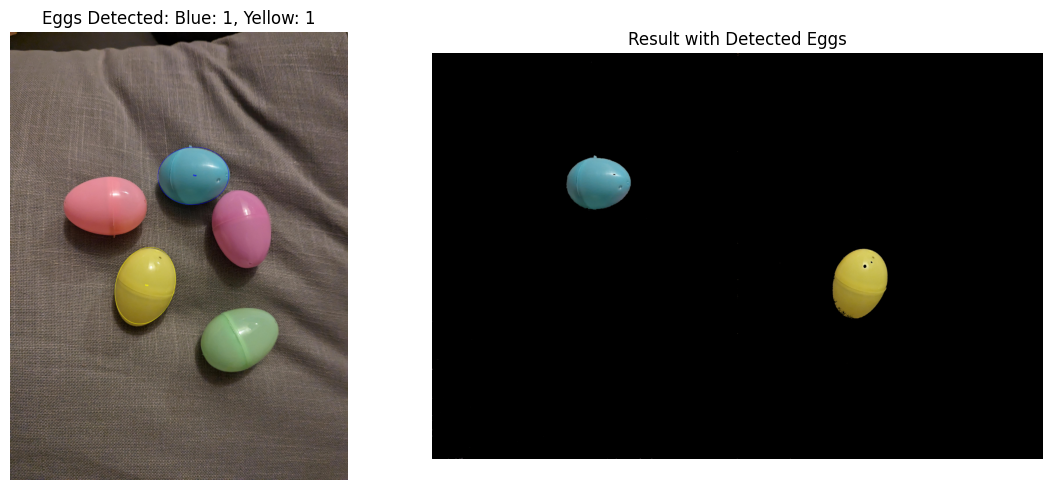

In [35]:
# Initialize egg counters
egg_count_blue = 0
egg_count_yellow = 0

# Loop through blue contours
for contour in contours_blue:
    if cv2.contourArea(contour) > 500:  # Avoid small noise areas
        egg_count_blue += 1
        # Fit ellipse to the contour and draw it
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(img, ellipse, (255, 0, 0), 2)  # Blue
        # Draw label
        (x, y), (MA, ma), angle = ellipse
        cv2.putText(img, "Egg", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Loop through yellow contours
for contour in contours_yellow:
    if cv2.contourArea(contour) > 500:  # Avoid small noise areas
        egg_count_yellow += 1
        # Fit ellipse to the contour and draw it
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(img, ellipse, (0, 255, 255), 2)  # Yellow
        # Draw label
        (x, y), (MA, ma), angle = ellipse
        cv2.putText(img, "Egg", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

# Combine blue and yellow results
result = np.hstack((result_blue, result_yellow))

# Show results
plt.figure(figsize=(12, 5))

# Show original image with drawn ellipses and labels
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Eggs Detected: Blue: {egg_count_blue}, Yellow: {egg_count_yellow}")
plt.axis('off')

# Show result images
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Result with Detected Eggs")
plt.axis('off')

plt.tight_layout()
plt.show()

#### BONUS: pre-processing technique Blurring